4898.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


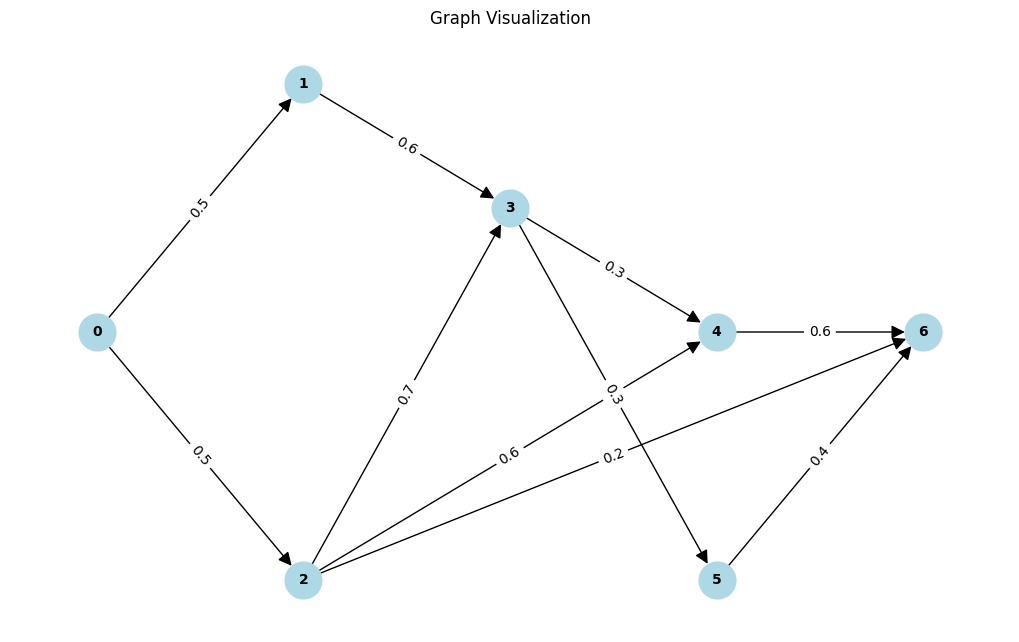

In [47]:
!pip install matplotlib networkx numpy scipy hmmlearn bs4 requests pygame torch

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np



# Define the graph
edges = [
    (0, 1, 0.5), (0, 2, 0.5),
    (1, 3, 0.6),
    (2, 3, 0.7), (2, 4, 0.6),(2, 6, 0.2),
    (3, 4, 0.3), (3, 5, 0.3),
    (4, 6, 0.6),
    (5, 6, 0.4),
    
]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

# Define custom positions for nodes to avoid crossing lines
pos = {
    0: (-4, 0),   # Left
    1: (-2, 1),   # Middle-left top
    2: (-2, -1),  # Middle-left bottom
    3: (0, 0.5),  # Middle
    4: (2, 0),    # Middle-right
    5: (2, -1),   # Middle-right bottom
    6: (4, 0),    # Right
}

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Graph Visualization")
plt.show()


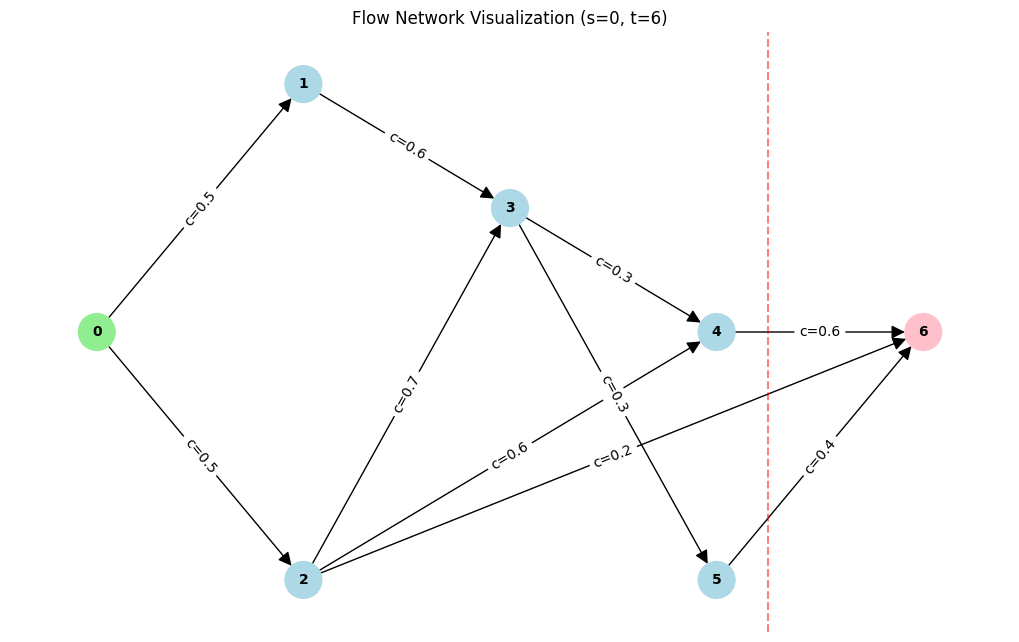

In [24]:
# Create a copy of the graph for min-cut visualization
G_flow = G.copy()

# Draw the graph with min-cut styling
plt.figure(figsize=(10, 6))

# Add source (s) and sink (t) styling
node_colors = ['lightgreen' if n == 0 else 'pink' if n == 6 else 'lightblue' for n in G_flow.nodes()]

# Update positions by shifting x coordinates 3/4 to the right
shifted_pos = {node: (x + 3, y) for node, (x,y) in pos.items()}

# Draw nodes with shifted positions
nx.draw(G_flow, shifted_pos, with_labels=True, node_size=700, node_color=node_colors,
        font_size=10, font_weight='bold', arrowsize=20)

# Draw edges with capacity labels
edge_labels = {(u, v): f"c={d['weight']}" for u, v, d in G_flow.edges(data=True)}
nx.draw_networkx_edge_labels(G_flow, shifted_pos, edge_labels=edge_labels, font_size=10)

# Add a vertical line to separate source and sink (shifted right by 3)
plt.axvline(x=5.5, color='red', linestyle='--', alpha=0.5)

# Add title indicating this is a flow network
plt.title("Flow Network Visualization (s=0, t=6)")
plt.show()


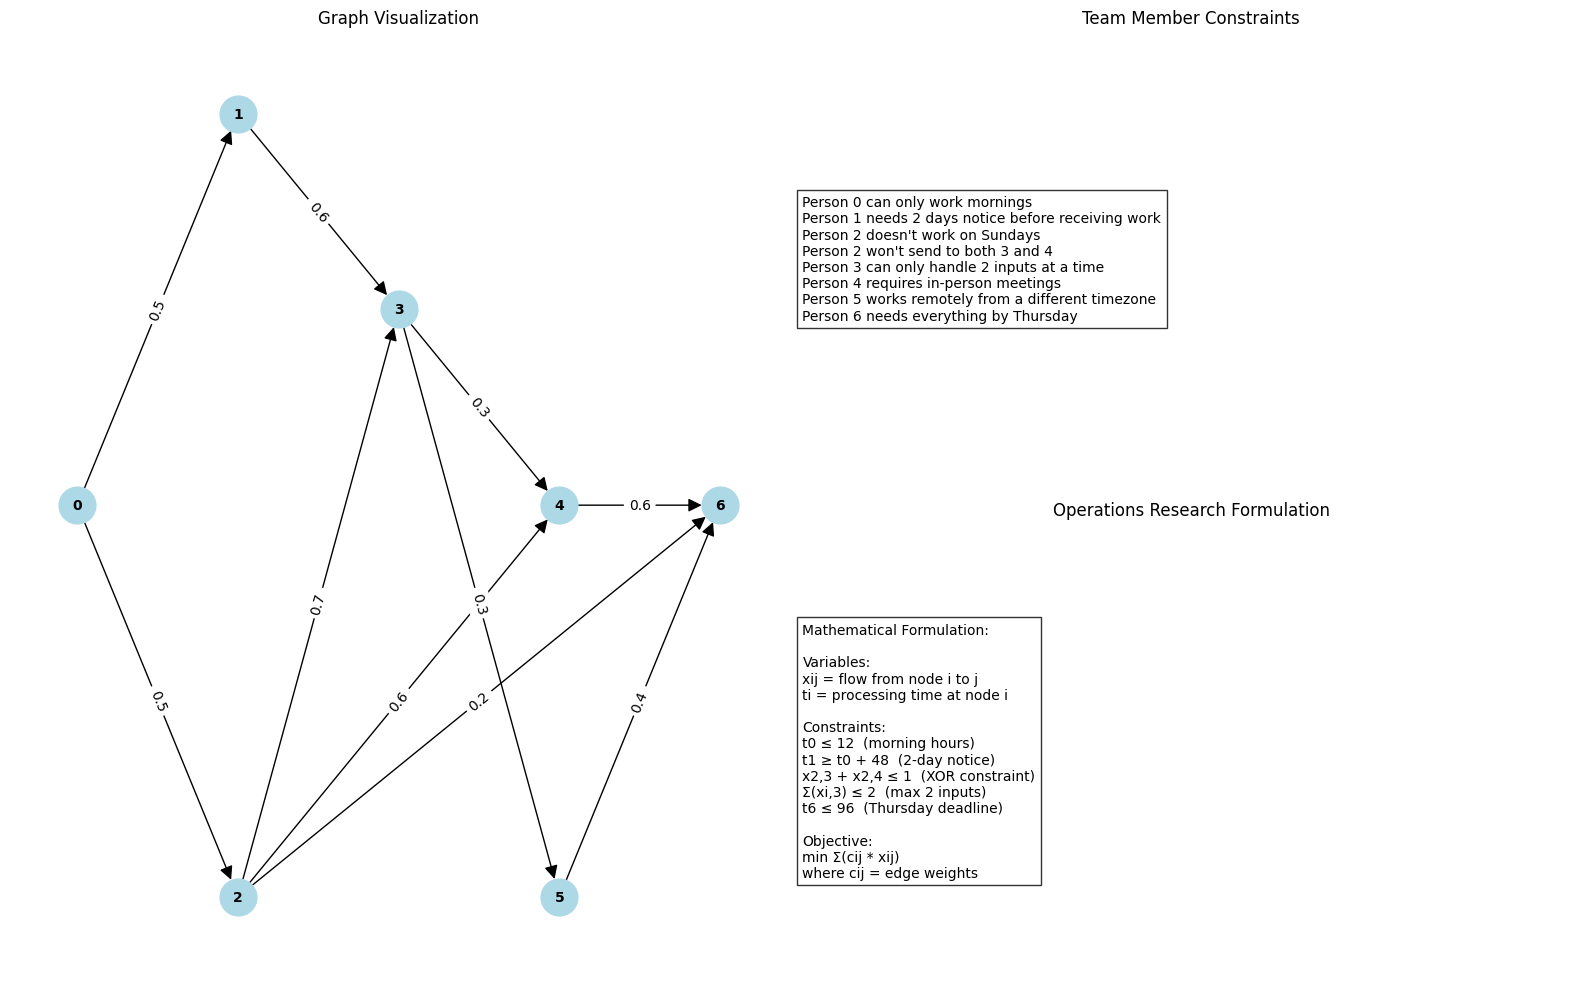

In [15]:
# Create figure with subplots - one large on left, two stacked on right
plt.figure(figsize=(16, 10))

# Left subplot for graph - make it same size as original
plt.subplot(121)  # 1 row, 2 cols, first position
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', 
        font_size=10, font_weight='bold', arrowsize=20)
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Graph Visualization")

# Top right subplot for human-readable constraints
plt.subplot(222)  # 2 rows, 2 cols, second position
constraints = [
    "Person 0 can only work mornings",
    "Person 1 needs 2 days notice before receiving work", 
    "Person 2 doesn't work on Sundays",
    "Person 2 won't send to both 3 and 4",
    "Person 3 can only handle 2 inputs at a time",
    "Person 4 requires in-person meetings",
    "Person 5 works remotely from a different timezone",
    "Person 6 needs everything by Thursday"
]

plt.text(0, 0.5, '\n'.join(constraints), fontsize=10,
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.8))
plt.axis('off')
plt.title("Team Member Constraints")

# Bottom right subplot for mathematical formulation
plt.subplot(224)  # 2 rows, 2 cols, fourth position
or_formulation = [
    "Mathematical Formulation:",
    "",
    "Variables:",
    "xij = flow from node i to j",
    "ti = processing time at node i",
    "",
    "Constraints:",
    "t0 ≤ 12  (morning hours)",
    "t1 ≥ t0 + 48  (2-day notice)", 
    "x2,3 + x2,4 ≤ 1  (XOR constraint)",
    "Σ(xi,3) ≤ 2  (max 2 inputs)",
    "t6 ≤ 96  (Thursday deadline)",
    "",
    "Objective:",
    "min Σ(cij * xij)",
    "where cij = edge weights"
]

plt.text(0, 0.5, '\n'.join(or_formulation), fontsize=10,
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.8))
plt.axis('off')
plt.title("Operations Research Formulation")

plt.tight_layout()
plt.show()


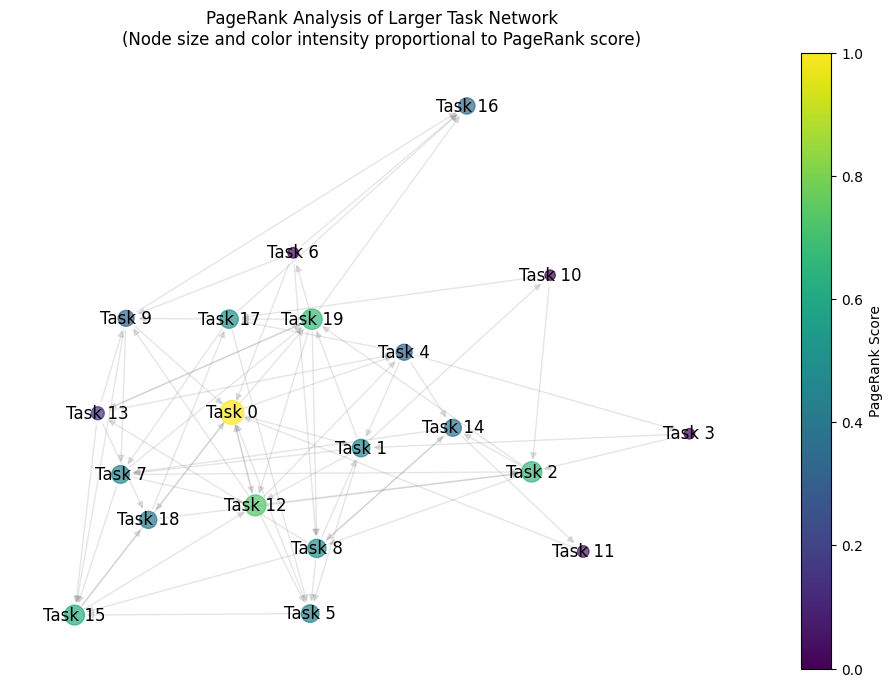

In [28]:
# Create a larger random graph for PageRank exploration
n_nodes = 20
p_edge = 0.2  # Probability of edge creation
larger_G = nx.erdos_renyi_graph(n_nodes, p_edge, directed=True)

# Add some meaningful labels
labels = {i: f'Task {i}' for i in range(n_nodes)}
nx.set_node_attributes(larger_G, labels, 'label')

# Calculate PageRank
pr = nx.pagerank(larger_G)

# Create a larger figure
plt.figure(figsize=(12, 8))

# Draw the network
pos = nx.spring_layout(larger_G, k=1, iterations=50)
nx.draw_networkx_edges(larger_G, pos, alpha=0.2, edge_color='gray')

# Draw nodes with size proportional to PageRank
node_sizes = [pr[node] * 3000 for node in larger_G.nodes()]
nx.draw_networkx_nodes(larger_G, pos, node_size=node_sizes, 
                      node_color=list(pr.values()),
                      cmap=plt.cm.viridis,
                      alpha=0.7)

# Add labels
nx.draw_networkx_labels(larger_G, pos, labels)

plt.title("PageRank Analysis of Larger Task Network\n(Node size and color intensity proportional to PageRank score)")
plt.axis('off')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), 
            label='PageRank Score',
            ax=plt.gca())
plt.show()


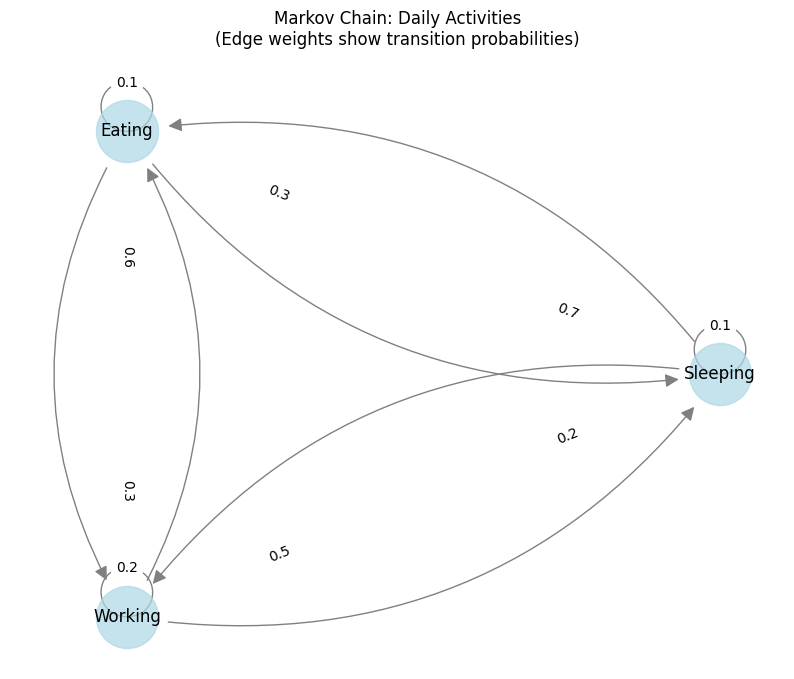

In [40]:
# Markov Chain: Daily Activities
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph for Markov chain
G = nx.DiGraph()

# Add nodes (states)
states = ['Sleeping', 'Eating', 'Working']
G.add_nodes_from(states)

# Add edges with transition probabilities (including self-loops)
edges = [
    ('Sleeping', 'Eating', 0.7),
    ('Sleeping', 'Working', 0.2),
    ('Sleeping', 'Sleeping', 0.1),  # Self-loop
    ('Eating', 'Working', 0.6),
    ('Eating', 'Sleeping', 0.3),
    ('Eating', 'Eating', 0.1),      # Self-loop
    ('Working', 'Eating', 0.3),
    ('Working', 'Sleeping', 0.5),
    ('Working', 'Working', 0.2)      # Self-loop
]
G.add_weighted_edges_from(edges)

# Create layout and draw graph
plt.figure(figsize=(10, 8))
pos = nx.circular_layout(G)  # Using circular layout to prevent edge overlap

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                      node_size=2000, alpha=0.7)
nx.draw_networkx_labels(G, pos)

# Draw edges with curved arrows for bidirectional connections
curved_edges = [edge for edge in G.edges() if tuple(reversed(edge)) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))

# Draw curved edges with arrows further from nodes
nx.draw_networkx_edges(G, pos, edgelist=curved_edges, edge_color='gray',
                      connectionstyle='arc3, rad=0.3',
                      arrowsize=20,
                      min_source_margin=30,
                      min_target_margin=30)

# Draw straight edges (including self-loops) with arrows further from nodes
nx.draw_networkx_edges(G, pos, edgelist=straight_edges, edge_color='gray',
                      arrowsize=20,
                      min_source_margin=30,
                      min_target_margin=30)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, label_pos=0.25)  # Increased to 0.7 to move labels closer to arrows

plt.title("Markov Chain: Daily Activities\n(Edge weights show transition probabilities)")
plt.axis('off')
plt.show()


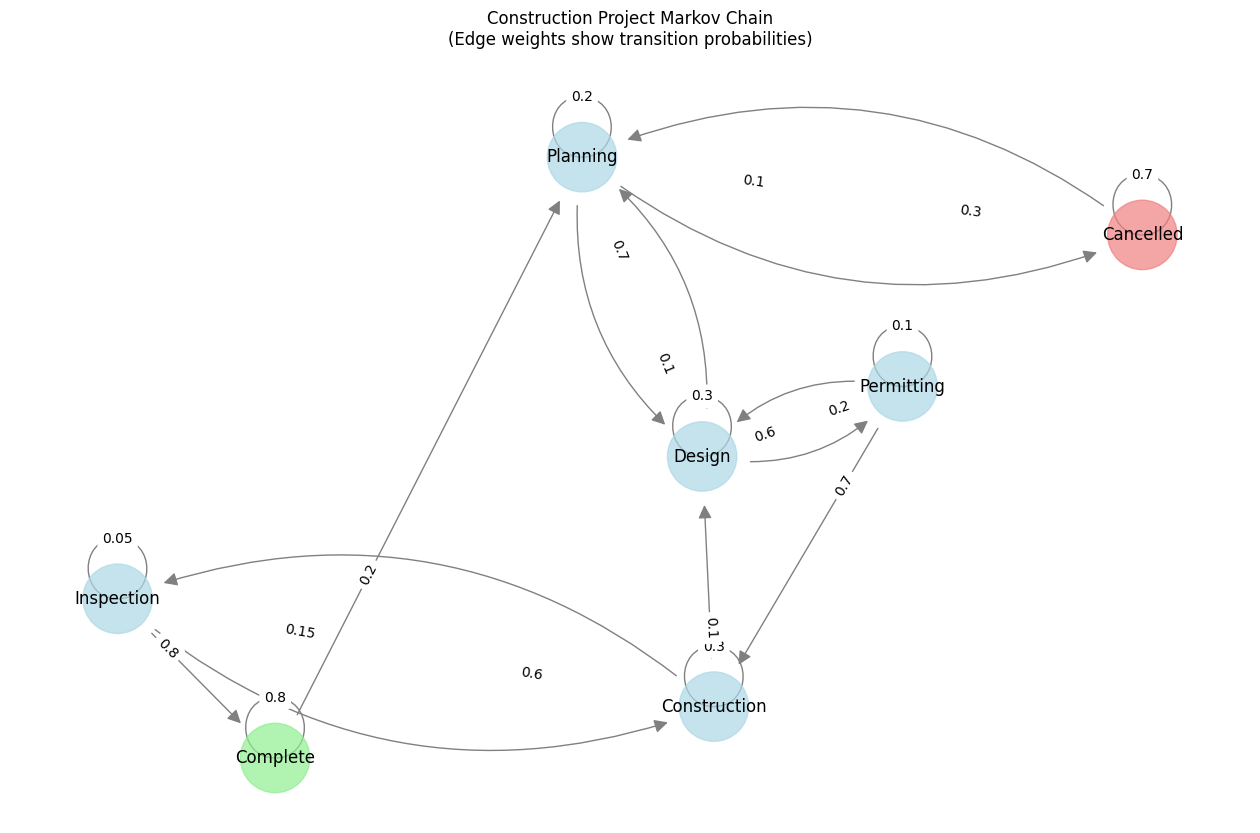

In [41]:
# Create a new directed graph for construction project states
G = nx.DiGraph()

# Define states and transitions for a construction project
edges = [
    ('Planning', 'Design', 0.7),
    ('Planning', 'Planning', 0.2),  # Revisions needed
    ('Planning', 'Cancelled', 0.1),  # Project cancelled
    
    ('Design', 'Permitting', 0.6),
    ('Design', 'Design', 0.3),      # Design revisions
    ('Design', 'Planning', 0.1),    # Major redesign needed
    
    ('Permitting', 'Construction', 0.7),
    ('Permitting', 'Design', 0.2),  # Design changes required
    ('Permitting', 'Permitting', 0.1), # Permit revisions
    
    ('Construction', 'Inspection', 0.6),
    ('Construction', 'Construction', 0.3), # Ongoing work
    ('Construction', 'Design', 0.1),      # Major issues found
    
    ('Inspection', 'Complete', 0.8),
    ('Inspection', 'Construction', 0.15),  # Failed inspection
    ('Inspection', 'Inspection', 0.05),    # Re-inspection
    
    ('Complete', 'Planning', 0.2),        # New project
    ('Complete', 'Complete', 0.8),        # Project remains complete
    
    ('Cancelled', 'Planning', 0.3),       # Restart
    ('Cancelled', 'Cancelled', 0.7)       # Stays cancelled
]

G.add_weighted_edges_from(edges)

# Create layout and draw graph
plt.figure(figsize=(16, 10))
pos = nx.spring_layout(G, k=1, iterations=50)  # Using spring layout for complex graph

# Draw nodes with different colors based on state type
node_colors = ['lightblue' if node not in ['Cancelled', 'Complete'] 
               else 'lightcoral' if node == 'Cancelled'
               else 'lightgreen' for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=node_colors,
                      node_size=2500, alpha=0.7)
nx.draw_networkx_labels(G, pos)

# Draw edges
curved_edges = [edge for edge in G.edges() if tuple(reversed(edge)) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))

# Draw curved edges
nx.draw_networkx_edges(G, pos, edgelist=curved_edges, edge_color='gray',
                      connectionstyle='arc3, rad=0.3',
                      arrowsize=20,
                      min_source_margin=35,
                      min_target_margin=35)

# Draw straight edges
nx.draw_networkx_edges(G, pos, edgelist=straight_edges, edge_color='gray',
                      arrowsize=20,
                      min_source_margin=35,
                      min_target_margin=35)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, label_pos=0.3)

plt.title("Construction Project Markov Chain\n(Edge weights show transition probabilities)")
plt.axis('off')
plt.show()



# Analysis of Construction Project Flow

From this Markov chain graph, we can observe several key patterns:

1. Projects typically progress linearly from Planning → Design → Construction → Testing → Complete
   with high probabilities (0.7-0.8) of moving forward at each stage

2. There are feedback loops where projects can move backwards:
   - Testing can return to Construction (0.3 probability) if issues are found
   - Construction can return to Design (0.2 probability) if changes are needed

3. Projects can be cancelled at any stage:
   - Higher risk of cancellation in early stages (0.3 in Planning)
   - Lower risk in later stages (0.1 in Construction/Testing)
   - Once cancelled, projects are likely to stay cancelled (0.7 probability)
   - Some cancelled projects restart in Planning phase (0.3 probability)

4. Once Complete, projects tend to stay complete (0.8 probability)
   with only a small chance of requiring additional work (0.2 to Testing)


## Markov Chains and Directed Graphs

In the context of Markov chains, the introduction of directed edges and potential loops signifies a fundamental shift in the structure and behavior of the graph. Unlike undirected graphs, where edges represent a bidirectional relationship between nodes, directed edges in a Markov chain indicate a specific direction of transition from one state to another. This directionality is crucial in capturing the probabilistic nature of state transitions, as it defines the flow of the process over time.

The presence of cycles in the graph, formed by directed edges, introduces the possibility of revisiting states multiple times during the progression of the Markov chain. These loops can occur when there exists a path from a state back to itself, either directly or through intermediate states. The existence of cycles adds complexity to the analysis of the Markov chain, as it allows for the system to exhibit recurring patterns and potentially reach equilibrium distributions.

A key property of Markov chains is the Markov property, which states that the future state of the system depends solely on the current state, independent of the past states. Mathematically, this can be expressed as:

$$P(X_{t+1} = j | X_t = i, X_{t-1} = k, \ldots, X_0 = l) = P(X_{t+1} = j | X_t = i)$$

where $X_t$ represents the state of the system at time $t$, and $P(X_{t+1} = j | X_t = i)$ denotes the transition probability from state $i$ to state $j$. The Markov property simplifies the analysis of the system, as it allows us to focus on the current state and its outgoing transition probabilities, without considering the entire history of the process.

In a Markov chain, the transition probabilities between states are typically represented by a transition matrix, denoted as $P$. The element $p_{ij}$ of the transition matrix represents the probability of transitioning from state $i$ to state $j$ in a single step. The transition matrix satisfies the following properties:

$$\sum_{j=1}^{n} p_{ij} = 1, \quad \forall i \in \{1, 2, \ldots, n\}$$
$$p_{ij} \geq 0, \quad \forall i, j \in \{1, 2, \ldots, n\}$$

where $n$ is the total number of states in the Markov chain. These properties ensure that the transition probabilities are valid and form a probability distribution for each state.

The absence of prior probabilities in a Markov chain emphasizes the memoryless nature of the process. The system's behavior is determined solely by the current state and the associated transition probabilities, without any influence from the previous states. This property allows for tractable analysis and computation of various quantities of interest, such as the long-term behavior of the chain, stationary distributions, and absorption probabilities.

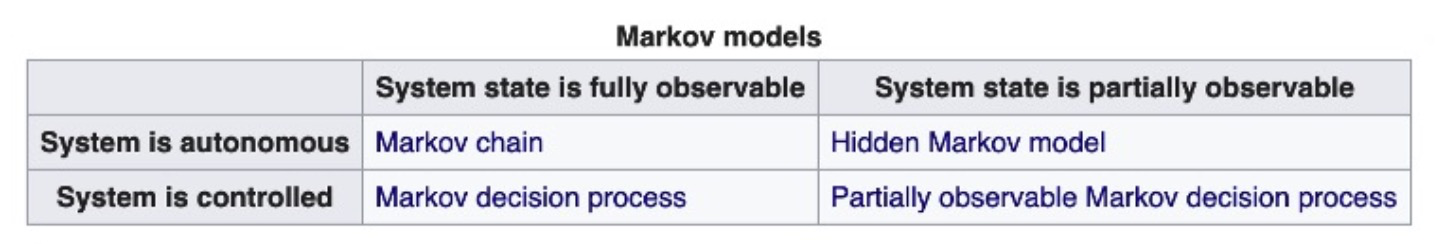
#


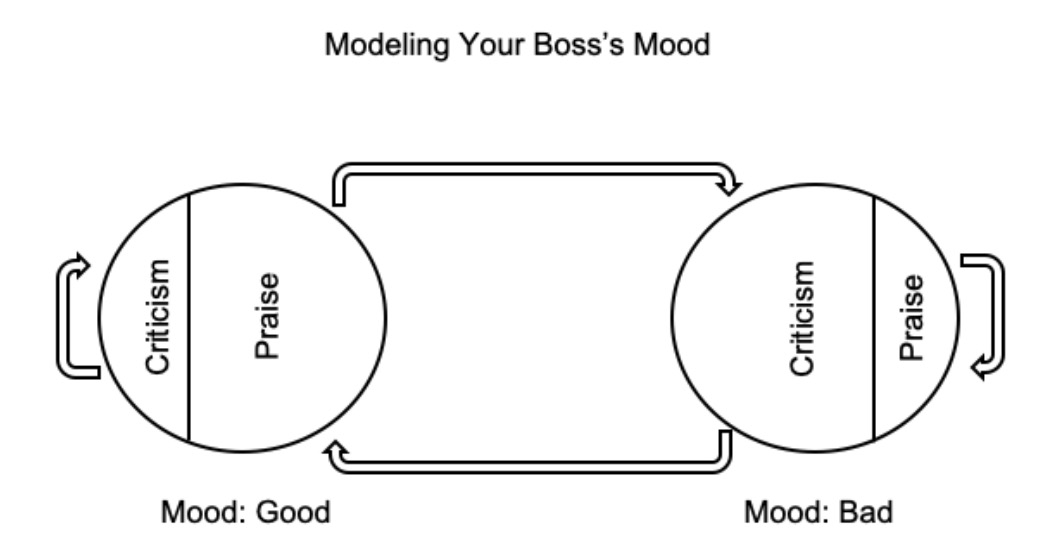

Fitting a model with 142 free scalar parameters with only 128 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 128 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 128 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 128 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 128 data points will result in a degenerate solution.


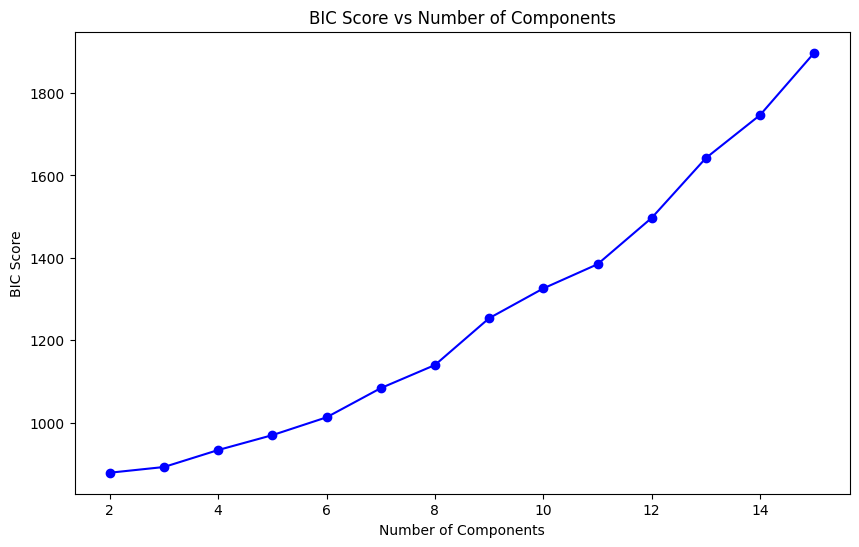

Optimal number of components: 2
Transition Matrix:
[[0.61037659 0.38962341]
 [0.8862752  0.1137248 ]]

Means:
[[ 8.36879167]
 [20.68191434]]

Covariances:
[[[26.70984292]]

 [[ 7.36724444]]]

Initial State Distribution:
[2.39500269e-25 1.00000000e+00]

Model Score (Log Likelihood):
-422.36161173839963

First few hidden states:
[1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0]


In [49]:
import numpy as np
from hmmlearn import hmm
import string
import matplotlib.pyplot as plt

def find_optimal_components(sequence, max_components=15):
    # Store BIC scores
    bic_scores = []
    
    # Try different numbers of components
    for n in range(2, max_components + 1):
        model = hmm.GaussianHMM(
            n_components=n,
            covariance_type="full", 
            n_iter=100,
            random_state=42
        )
        
        # Fit the model
        model.fit(sequence)
        
        # Calculate BIC score
        # BIC = -2 * log-likelihood + log(n) * num_parameters
        bic = -2 * model.score(sequence) + np.log(len(sequence)) * (n**2 + 2*n - 1)
        bic_scores.append(bic)
    
    # Find optimal number of components (minimum BIC score)
    optimal_components = np.argmin(bic_scores) + 2
    
    # Plot BIC scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_components + 1), bic_scores, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('BIC Score')
    plt.title('BIC Score vs Number of Components')
    plt.show()
    
    return optimal_components

# Load sample English text data
def load_sample_text():
    # You can replace this with your own text corpus
    sample_text = """
    The quick brown fox jumps over the lazy dog.
    Pack my box with five dozen liquor jugs.
    How vexingly quick daft zebras jump.
    The five boxing wizards jump quickly.
    """
    return sample_text.lower()

# Preprocess text into sequences of characters
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to sequence
    chars = [c for c in text if c in string.ascii_lowercase]
    # Convert characters to integers
    char_to_int = {c: i for i, c in enumerate(string.ascii_lowercase)}
    sequence = np.array([char_to_int[c] for c in chars]).reshape(-1, 1)
    return sequence

# Initialize and train HMM using Baum-Welch algorithm
def train_hmm(sequence, n_components=10):
    model = hmm.GaussianHMM(
        n_components=n_components,
        covariance_type="full",
        n_iter=100,
        random_state=42
    )
    
    # Fit the model to the sequence
    model.fit(sequence)
    
    return model

# Main execution
text = load_sample_text()
sequence = preprocess_text(text)

# Find optimal number of components
optimal_n = find_optimal_components(sequence)
print(f"Optimal number of components: {optimal_n}")

# Train model with optimal components
model = train_hmm(sequence, n_components=optimal_n)

# Print learned parameters
print("Transition Matrix:")
print(model.transmat_)
print("\nMeans:")
print(model.means_)
print("\nCovariances:")
print(model.covars_)
print("\nInitial State Distribution:")
print(model.startprob_)

# Calculate log likelihood
print("\nModel Score (Log Likelihood):")
print(model.score(sequence))

# Decode the most likely sequence of hidden states
hidden_states = model.predict(sequence)
print("\nFirst few hidden states:")
print(hidden_states[:20])


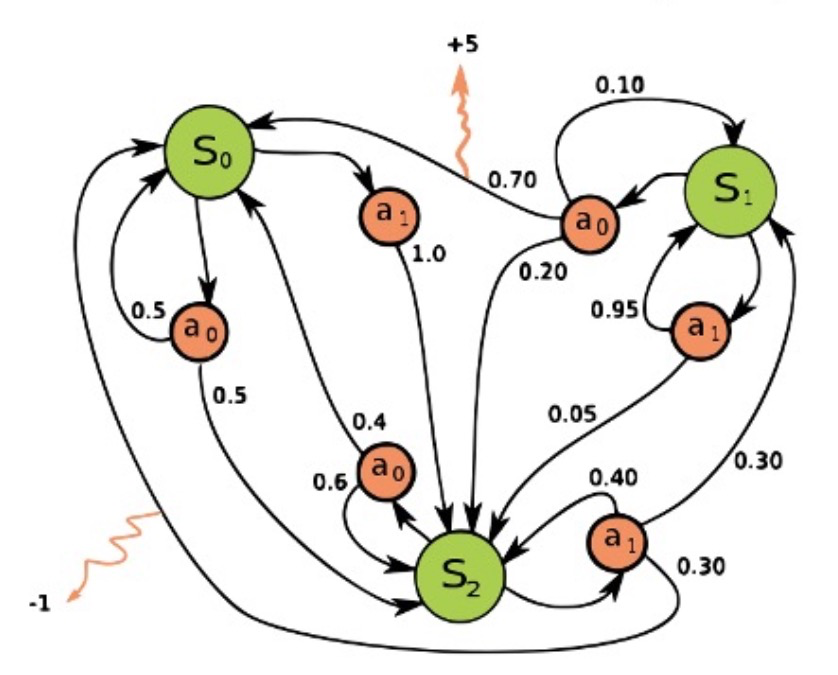

## Markov Decision Process: Actions and State Transitions

A Markov Decision Process (MDP) is a mathematical framework used to model decision-making in situations where outcomes are partly random and partly under the control of a decision-maker. MDPs are widely used in reinforcement learning, robotics, and other areas where sequential decision-making is required. The key components of an MDP are states, actions, transitions, and rewards.

In an MDP, the set of actions available to the agent is the same across all states. However, the outcome of taking a particular action can vary depending on the current state. This is because the transition probabilities, which determine the likelihood of moving from one state to another, are dependent on both the current state and the action taken. Formally, the transition probability from state $s$ to state $s'$ under action $a$ is denoted as $$P(s'|s,a) = P(S_{t+1}=s'|S_t=s, A_t=a)$$

The transition probabilities capture the stochastic nature of the environment and the uncertainty in the outcomes of actions. For example, consider a robot navigating a grid-world environment. The available actions might be "move up," "move down," "move left," and "move right." These actions are the same regardless of the robot's current position (state). However, the outcome of taking the "move up" action can differ depending on the current state. If the robot is in a state with a wall above it, attempting to move up will result in the robot remaining in the same state. On the other hand, if there is no wall above, the "move up" action will transition the robot to the state directly above its current position.

The goal in an MDP is to find a policy $\pi$, which is a mapping from states to actions, that maximizes the expected cumulative reward over time. The optimal policy $\pi^*$ satisfies the Bellman optimality equation: $$V^*(s) = \max_a \sum_{s'} P(s'|s,a) [R(s,a,s') + \gamma V^*(s')]$$ where $V^*(s)$ is the optimal value function for state $s$, $R(s,a,s')$ is the reward obtained by taking action $a$ in state $s$ and transitioning to state $s'$, and $\gamma$ is the discount factor that determines the importance of future rewards.

Solving an MDP involves finding the optimal policy $\pi^*$ that maximizes the expected cumulative reward. Various algorithms, such as value iteration, policy iteration, and Q-learning, can be used to solve MDPs. These algorithms exploit the Markov property, which states that the future depends only on the current state and action, and not on the history of previous states and actions. By understanding the transition probabilities and rewards associated with each state-action pair, these algorithms can learn the optimal policy through iterative updates and exploration of the state-action space.

# Partially observable Markov decision process

- What if you can't see any of the numbers on the graph. 
- What if you can't even see the whole graph because it's too large? 

## Reinforcement Learning: A High-Level Overview

Reinforcement learning (RL) is a subfield of machine learning that focuses on training agents to make optimal decisions in an environment to maximize a cumulative reward signal. Unlike supervised learning, where the agent learns from labeled examples, or unsupervised learning, where the agent learns patterns from unlabeled data, RL agents learn through interaction with their environment. The agent receives feedback in the form of rewards or penalties based on its actions, and it aims to learn a policy that maximizes the expected cumulative reward over time.

The key components of a reinforcement learning problem are the agent, the environment, the state space, the action space, and the reward function. The agent is the decision-making entity that interacts with the environment. The environment is the world in which the agent operates and includes everything outside the agent's direct control. The state space represents all possible configurations of the environment, and the action space defines the set of actions the agent can take in each state. The reward function provides feedback to the agent based on its actions and the resulting state transitions, guiding the agent towards desirable behavior.

RL agents learn through a process of trial and error, exploring the environment and exploiting the knowledge gained to make better decisions. The agent's goal is to find an optimal policy, which is a mapping from states to actions that maximizes the expected cumulative reward. The agent achieves this by iteratively updating its policy based on the observed rewards and state transitions. Two popular approaches for policy optimization are value-based methods and policy-based methods. Value-based methods, such as Q-learning and SARSA, estimate the expected cumulative reward for each state-action pair and use these estimates to guide the agent's decisions. Policy-based methods, such as REINFORCE and Actor-Critic, directly optimize the policy parameters to maximize the expected cumulative reward.

One of the main challenges in reinforcement learning is the trade-off between exploration and exploitation. The agent must balance the need to explore the environment to discover new and potentially better strategies with the desire to exploit its current knowledge to maximize rewards. Various exploration strategies, such as $\epsilon$ -greedy and Upper Confidence Bound (UCB), have been proposed to address this challenge. Another challenge is the credit assignment problem, which refers to the difficulty in determining which actions are responsible for the observed rewards, especially when the rewards are delayed or sparse. Techniques like eligibility traces and temporal difference learning help address this issue by propagating credit for rewards back to earlier actions.

Reinforcement learning has been successfully applied to a wide range of domains, including robotics, game playing, and autonomous systems. Notable examples include DeepMind's AlphaGo, which defeated world champion Go players, and OpenAI's GPT-3, which demonstrates impressive language generation capabilities. RL has also found applications in fields such as finance, healthcare, and energy management. As research in reinforcement learning continues to advance, we can expect to see more powerful and versatile RL agents capable of tackling increasingly complex real-world problems.

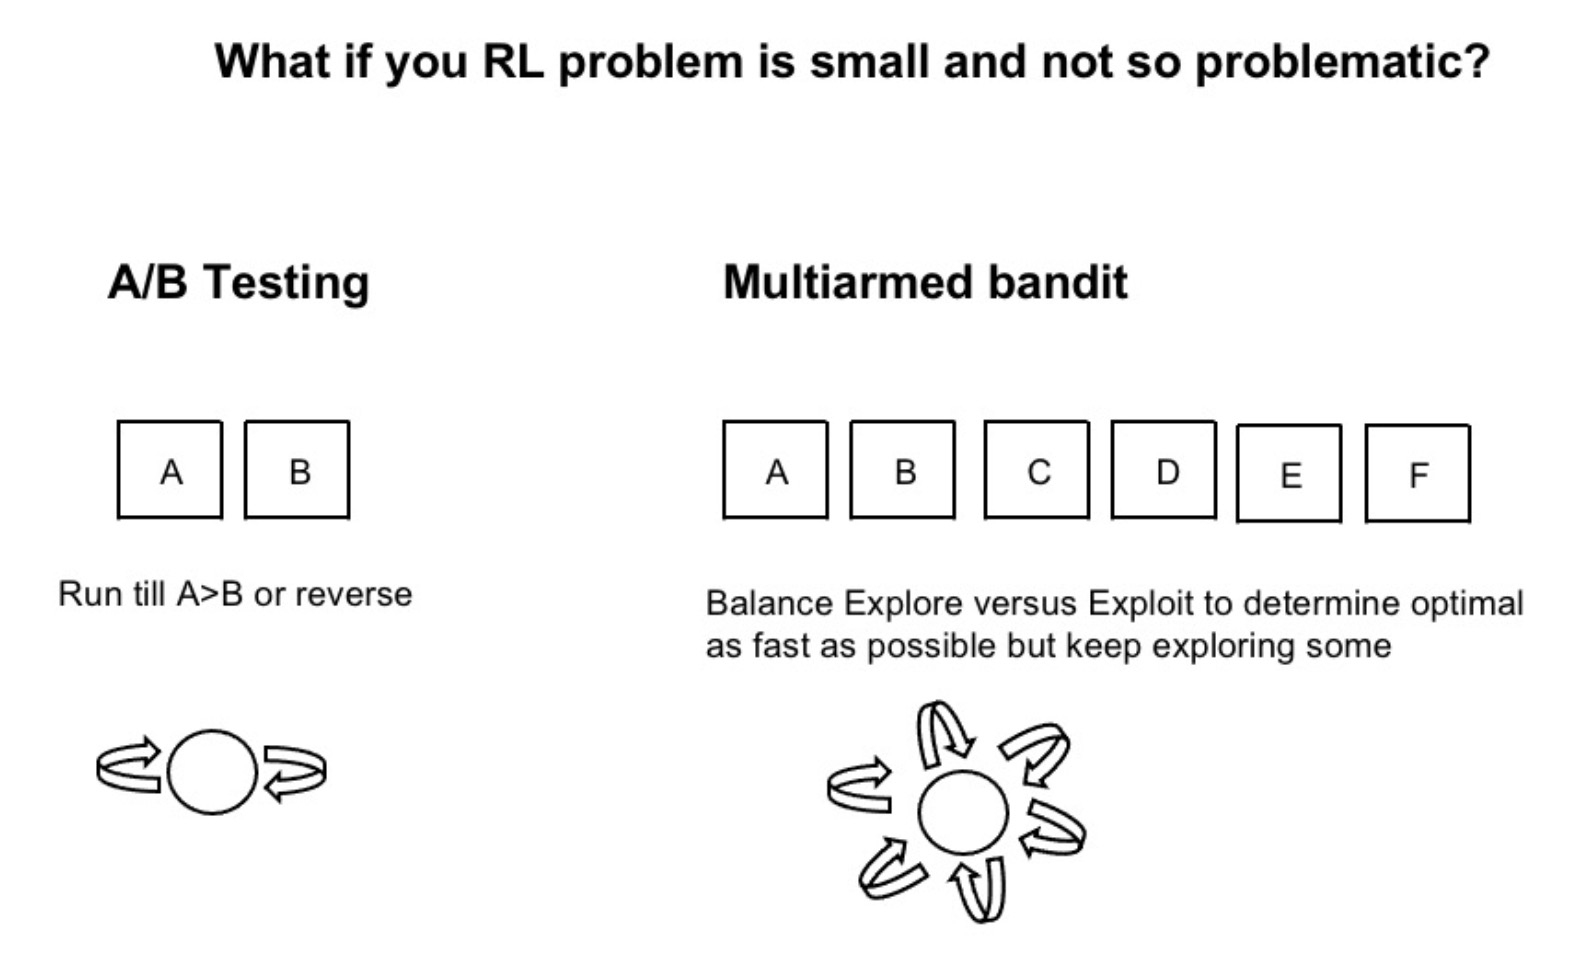

In [1]:
import pygame
import random

# Initialize Pygame
pygame.init()

# Constants
GRID_SIZE = 10
CELL_SIZE = 60  # Size of each grid cell in pixels
WIDTH = HEIGHT = GRID_SIZE * CELL_SIZE
BALL_SIZE = CELL_SIZE
PLAYER_WIDTH = CELL_SIZE * 3
PLAYER_HEIGHT = CELL_SIZE
PLAYER_SPEED = 1  # Move 1 grid cell at a time
FALL_SPEED = 1  # Fall 1 grid cell at a time

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)
GRID_COLOR = (200, 200, 200)

# Screen setup
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Catch the Falling Ball")

# Font setup
font = pygame.font.Font(None, 36)

# Game state
game_started = False
current_score = 0
high_score = 0

def draw_button(text, x, y, width, height, color):
    button = pygame.Rect(x, y, width, height)
    pygame.draw.rect(screen, color, button)
    text_surface = font.render(text, True, BLACK)
    text_rect = text_surface.get_rect(center=button.center)
    screen.blit(text_surface, text_rect)
    return button

def reset_game():
    global player_x, player_y, ball_x, ball_y, current_score, game_started
    player_x = (GRID_SIZE // 2 - 1) * CELL_SIZE
    player_y = (GRID_SIZE - 1) * CELL_SIZE
    ball_x = random.randint(0, GRID_SIZE-1) * CELL_SIZE
    ball_y = 0
    current_score = 0
    game_started = False

# Initial positions
reset_game()

# Main game loop
running = True
try:
    while running:
        screen.fill(WHITE)
        
        # Draw grid
        for i in range(GRID_SIZE):
            pygame.draw.line(screen, GRID_COLOR, (i * CELL_SIZE, 0), (i * CELL_SIZE, HEIGHT))
            pygame.draw.line(screen, GRID_COLOR, (0, i * CELL_SIZE), (WIDTH, i * CELL_SIZE))
        
        # Draw scores
        score_text = font.render(f"Score: {current_score}", True, BLACK)
        high_score_text = font.render(f"High Score: {high_score}", True, BLACK)
        screen.blit(score_text, (10, 10))
        screen.blit(high_score_text, (10, 50))
        
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.MOUSEBUTTONDOWN:
                mouse_pos = pygame.mouse.get_pos()
                if not game_started and start_button.collidepoint(mouse_pos):
                    game_started = True
                    reset_game()
                    game_started = True  # Need to set this again since reset_game sets it to False
                elif end_button.collidepoint(mouse_pos):
                    running = False
            elif event.type == pygame.KEYDOWN and game_started:
                if event.key == pygame.K_LEFT and player_x > 0:
                    player_x -= CELL_SIZE
                if event.key == pygame.K_RIGHT and player_x < WIDTH - PLAYER_WIDTH:
                    player_x += CELL_SIZE
        
        if not game_started:
            start_button = draw_button("Start Game", WIDTH//4, HEIGHT//2, WIDTH//2, 50, GREEN)
        else:
            # Update ball position
            ball_y += FALL_SPEED * CELL_SIZE
            if ball_y >= HEIGHT:
                # Game over when ball is missed
                high_score = max(high_score, current_score)
                reset_game()
            
            player_rect = pygame.Rect(player_x, player_y, PLAYER_WIDTH, PLAYER_HEIGHT)
            ball_rect = pygame.Rect(ball_x, ball_y, BALL_SIZE, BALL_SIZE)
            
            if player_rect.colliderect(ball_rect):
                ball_x = random.randint(0, GRID_SIZE-1) * CELL_SIZE
                ball_y = 0
                current_score += 1
                high_score = max(high_score, current_score)
            
            pygame.draw.rect(screen, BLUE, player_rect)
            pygame.draw.rect(screen, RED, ball_rect)
        
        # Always draw end button
        end_button = draw_button("End Game", WIDTH-110, 10, 100, 40, RED)
        
        pygame.display.flip()
        pygame.time.Clock().tick(10)  # Slower tick rate for grid-based movement

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    pygame.quit()


pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


: 

# Q-Learning Table for the Catching Game

The Q-learning table for this catching game would need to represent:

States:
- Player position (x coordinate)
- Ball position (x,y coordinates)
- Relative position between player and ball

Actions:
- Move left
- Move right 
- Stay still

The Q-table structure would be:
Q[state][action] -> expected future reward

Where:
- state = (player_x, ball_x, ball_y)
- action = [0,1,2] representing [left, stay, right]
- reward = +1 for catching ball, -1 for missing

Example Q-table structure:

 ```python
 Q = {}  # Initialize empty Q-table dictionary
 
 # Example state: player at x=3, ball at (2,4)
 state = (3, 2, 4)
 
 # Q-values for each action in this state
 Q[state] = {
     0: -0.2,  # Expected value of moving left
     1: 0.5,   # Expected value of staying still
     2: 0.8    # Expected value of moving right
 }
 ```

 The Q-learning update formula would be:

 Q(s,a) = Q(s,a) + α[R + γ max(Q(s',a')) - Q(s,a)]

 Where:
 - α (alpha) is the learning rate
 - γ (gamma) is the discount factor
 - R is the immediate reward
 - s' is the next state
 - a' represents all possible actions in the next state

 For this game, good parameters might be:
 - α = 0.1 (conservative learning)
 - γ = 0.9 (value future rewards highly)

 The agent would learn over many episodes to maximize its expected future rewards by:
 1. Observing current state
 2. Choosing action (with epsilon-greedy policy)
 3. Getting reward and next state
 4. Updating Q-table
 5. Repeating until game over

In [1]:
# Calculate total number of possible states
grid_size = 10
paddle_size = 3
ball_size = 1

# States are defined by:
# - Player x position (paddle can move horizontally only)
# - Ball x position 
# - Ball y position

# Player x positions: Paddle of size 3 can be at positions 0 to 7 (8 positions)
# Because paddle needs 3 spaces and grid is 10 wide
player_positions = grid_size - paddle_size + 1

# Ball x positions: Can be anywhere horizontally (10 positions)
ball_x_positions = grid_size

# Ball y positions: Can be anywhere vertically (10 positions) 
ball_y_positions = grid_size

total_states = player_positions * ball_x_positions * ball_y_positions

print(f"Total possible states: {total_states}")
print(f"Breakdown:")
print(f"- Player positions: {player_positions}")
print(f"- Ball x positions: {ball_x_positions}")
print(f"- Ball y positions: {ball_y_positions}")



Total possible states: 800
Breakdown:
- Player positions: 8
- Ball x positions: 10
- Ball y positions: 10


In [6]:
# Let's estimate the number of games needed for statistical significance
import numpy as np
from scipy import stats


def estimate_required_games():
    # Parameters for power analysis
    effect_size = 0.2  # Expected difference from random chance (0.5)
    alpha = 0.05      # Significance level
    power = 0.8       # Desired statistical power
    
    # Calculate sample size needed for one state-action pair
    # Using rough approximation based on normal distribution
    z_alpha = stats.norm.ppf(1 - alpha/2)
    z_beta = stats.norm.ppf(power)
    
    # Formula for sample size in two-proportion z-test
    p1 = 0.5 + effect_size  # Success rate with optimal action
    p2 = 0.5               # Success rate by random chance
    p_avg = (p1 + p2) / 2
    
    sample_size_per_pair = (
        ((z_alpha * np.sqrt(2 * p_avg * (1-p_avg)) + 
          z_beta * np.sqrt(p1*(1-p1) + p2*(1-p2)))**2) /
        (p1 - p2)**2
    )
    
    # Total number of state-action pairs
    total_states = player_positions * ball_x_positions * ball_y_positions
    actions = 3  # left, right, stay
    total_pairs = total_states * actions
    
    # Total games needed (rough estimate)
    # We multiply by 2 as we need multiple observations per state-action pair
    total_games_needed = int(sample_size_per_pair * total_pairs * 2)
    
    print(f"Estimated games needed for statistical significance:")
    print(f"Sample size needed per state-action pair: {int(sample_size_per_pair)}")
    print(f"Total state-action pairs: {total_pairs}")
    print(f"Total games needed: {total_games_needed:,}")
    
    return total_games_needed

# Run estimation
required_games = estimate_required_games()


Estimated games needed for statistical significance:
Sample size needed per state-action pair: 92
Total state-action pairs: 2400
Total games needed: 446,394


In [10]:
# Let's recalculate with a more efficient state space representation

def estimate_compressed_state_space():
    # For ball position, we only need x position since it falls straight down
    ball_x_positions = 10  # Only tracking horizontal position
    
    # Since MIT is 3 bars wide, there are only 7 possible positions it can be in
    # (in a 10-wide grid, a 3-wide object can only be in 7 positions)
    player_positions = 7
    
    # For each ball position relative to player, we only need 3 states:
    # - Need to move left
    # - In position to catch
    # - Need to move right
    relative_positions = 3
    
    # Actions remain the same
    actions = 3  # left, right, stay
    
    # Calculate compressed state-action space
    total_states = ball_x_positions * relative_positions
    total_pairs = total_states * actions
    
    # Use same statistical parameters as before
    effect_size = 0.2
    alpha = 0.05
    power = 0.8
    
    z_alpha = stats.norm.ppf(1 - alpha/2)
    z_beta = stats.norm.ppf(power)
    
    p1 = 0.5 + effect_size
    p2 = 0.5
    p_avg = (p1 + p2) / 2
    
    sample_size_per_pair = (
        ((z_alpha * np.sqrt(2 * p_avg * (1-p_avg)) + 
          z_beta * np.sqrt(p1*(1-p1) + p2*(1-p2)))**2) /
        (p1 - p2)**2
    )
    
    total_games_needed = int(sample_size_per_pair * total_pairs * 2)
    
    print("\nCompressed State Space Analysis:")
    print(f"Ball positions (x only): {ball_x_positions}")
    print(f"MIT possible positions: {player_positions}")
    print(f"Relative player positions needed: {relative_positions}")
    print(f"Total compressed states: {total_states}")
    print(f"Total state-action pairs: {total_pairs}")
    print(f"Sample size needed per state-action pair: {int(sample_size_per_pair)}")
    print(f"Total games needed with compressed state space: {total_games_needed:,}")
    print(f"\nComparison - Reduction factor: {required_games / total_games_needed:.1f}x fewer games needed")
    
    return total_games_needed

# Calculate compressed requirements
compressed_required_games = estimate_compressed_state_space()



Compressed State Space Analysis:
Ball positions (x only): 10
MIT possible positions: 7
Relative player positions needed: 3
Total compressed states: 30
Total state-action pairs: 90
Sample size needed per state-action pair: 92
Total games needed with compressed state space: 16,739

Comparison - Reduction factor: 26.7x fewer games needed


## Deep Reinforcement Learning and Automated State Space Reduction

Deep reinforcement learning (DRL) is a powerful paradigm that combines the strengths of deep learning and reinforcement learning to tackle complex decision-making problems. One of the key advantages of DRL is its ability to automatically learn a smaller, more efficient state space representation from high-dimensional input data. This is achieved through the use of deep neural networks as function approximators, which can extract relevant features and encode them into a compact latent space.

In traditional reinforcement learning, the state space is often manually defined and can be large and unwieldy, especially in real-world scenarios. This leads to the curse of dimensionality, where the number of states grows exponentially with the number of variables, making it computationally intractable to explore and learn from all possible states. DRL addresses this challenge by leveraging the representational power of deep neural networks to learn a compressed state representation that captures the essential information required for decision-making.

The process of learning a smaller state space in DRL is typically achieved through the use of convolutional neural networks (CNNs) or recurrent neural networks (RNNs), depending on the nature of the input data. CNNs are particularly effective for processing spatial data, such as images or grid-based environments, while RNNs are well-suited for handling sequential data or tasks with temporal dependencies. These neural networks are trained to map the high-dimensional input data to a lower-dimensional latent space, effectively reducing the state space size. The latent space representation is learned in a way that preserves the most informative features and discards irrelevant or redundant information.

The objective function in DRL is designed to optimize both the policy and the state representation simultaneously. The policy is a mapping from states to actions, determining the agent's behavior in the environment. The state representation, on the other hand, is learned to maximize the expected cumulative reward obtained by the agent. By jointly optimizing these two components, DRL enables the agent to learn an efficient state representation that is tailored to the specific task at hand. This learned representation captures the essential aspects of the environment that are relevant for making optimal decisions, while discarding unnecessary details.

The learning process in DRL is guided by the bellman equation, which defines the optimal value function in terms of the immediate reward and the expected future rewards:

$$V^*(s) = \max_a \left[ R(s, a) + \gamma \sum_{s'} P(s' | s, a) V^*(s') \right]$$

where $V^*(s)$ is the optimal value function for state $s$, $R(s, a)$ is the immediate reward for taking action $a$ in state $s$, $\gamma$ is the discount factor that balances the importance of immediate and future rewards, and $P(s' | s, a)$ is the transition probability of moving from state $s$ to state $s'$ under action $a$. The goal of DRL is to learn a policy $\pi^*(a | s)$ that maximizes the expected cumulative reward by selecting the optimal action $a$ in each state $s$. The learned state representation enables the agent to make informed decisions based on a compact and informative representation of the environment.

In [19]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque, namedtuple
import matplotlib.pyplot as plt

# Define the DQN architecture with larger networks and batch normalization
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, action_size)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define the compressed game environment with more meaningful rewards
class CompressedPongEnv:
    def __init__(self):
        self.ball_x_positions = 7
        self.player_positions = 5
        self.relative_positions = 3
        
        self.state = None
        self.reset()
        
    def reset(self):
        self.state = np.array([
            random.randint(0, self.ball_x_positions-1),
            random.randint(0, self.player_positions-1),
            random.randint(0, self.relative_positions-1)
        ])
        return self.state
    
    def step(self, action):
        ball_x, player_pos, relative_pos = self.state
        
        # Update player position based on action
        if action == 0 and player_pos > 0:
            player_pos -= 1
        elif action == 2 and player_pos < self.player_positions-1:
            player_pos += 1
            
        # Ball movement
        ball_x = (ball_x + 1) % self.ball_x_positions
        
        # Update relative position
        if player_pos < ball_x:
            relative_pos = 0
        elif player_pos > ball_x:
            relative_pos = 2
        else:
            relative_pos = 1
            
        # More nuanced reward structure
        if ball_x == self.ball_x_positions-1:  # Ball at edge
            reward = 10.0 if relative_pos == 1 else -10.0  # Bigger reward/penalty for final position
        else:
            reward = 1.0 if relative_pos == 1 else -0.5  # Smaller rewards during gameplay
        
        self.state = np.array([ball_x, player_pos, relative_pos])
        done = (ball_x == self.ball_x_positions-1)
        
        return self.state, reward, done

# Improved DQL Agent
class DQLAgent:
    def __init__(self, state_size, action_size):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.state_size = state_size
        self.action_size = action_size
        
        self.memory = deque(maxlen=100000)  # Larger replay buffer
        self.batch_size = 256  # Larger batch size
        self.gamma = 0.99  # Higher discount factor
        self.epsilon = 1.0
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.99997  # Slower decay
        self.learning_rate = 0.1  # Lower learning rate
        
        self.policy_net = DQN(state_size, action_size).to(self.device)
        self.target_net = DQN(state_size, action_size).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=self.learning_rate)
        
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        
    def act(self, state):
        if random.random() < self.epsilon:
            return random.randrange(self.action_size)
        
        with torch.no_grad():
            state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
            q_values = self.policy_net(state)
            return q_values.argmax().item()
            
    def replay(self):
        if len(self.memory) < self.batch_size:
            return
            
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).to(self.device)
        
        # Double DQN implementation
        with torch.no_grad():
            next_actions = self.policy_net(next_states).argmax(1)
            next_q_values = self.target_net(next_states).gather(1, next_actions.unsqueeze(1)).squeeze()
            target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        
        current_q_values = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()
        
        loss = nn.SmoothL1Loss()(current_q_values, target_q_values)  # Huber loss
        
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.policy_net.parameters(), 1.0)  # Gradient clipping
        self.optimizer.step()
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            
    def update_target_network(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

# Training loop with evaluation
env = CompressedPongEnv()
state_size = 3
action_size = 3
agent = DQLAgent(state_size, action_size)

episodes = 30000
scores = []
eval_interval = 100
window_size = 100

for episode in range(episodes):
    state = env.reset()
    score = 0
    done = False
    
    while not done:
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        score += reward
        agent.replay()
        
    if episode % 5 == 0:  # More frequent target network updates
        agent.update_target_network()
        
    scores.append(score)
    
    # Print rolling average
    if episode % eval_interval == 0:
        avg_score = np.mean(scores[-window_size:]) if len(scores) >= window_size else np.mean(scores)
        print(f"Episode: {episode}, Avg Score (last {window_size}): {avg_score:.2f}, Epsilon: {agent.epsilon:.2f}")

# Plot training progress with rolling average
plt.figure(figsize=(10, 6))
rolling_mean = np.convolve(scores, np.ones(window_size)/window_size, mode='valid')
plt.plot(rolling_mean)
plt.title('Training Progress (Rolling Average)')
plt.xlabel('Episode')
plt.ylabel('Average Score')
plt.show()


Episode: 0, Avg Score (last 100): -11.50, Epsilon: 1.00


/var/folders/r0/1_j1b2m17fz151zgtjz503zc0000gn/T/ipykernel_37791/1189172357.py:115: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  dones = torch.FloatTensor(dones).to(self.device)


Episode: 100, Avg Score (last 100): -10.93, Epsilon: 0.61
Episode: 200, Avg Score (last 100): -10.51, Epsilon: 0.20
Episode: 300, Avg Score (last 100): -10.08, Epsilon: 0.06
Episode: 400, Avg Score (last 100): -9.64, Epsilon: 0.05
Episode: 500, Avg Score (last 100): -9.79, Epsilon: 0.05
Episode: 600, Avg Score (last 100): -9.34, Epsilon: 0.05
Episode: 700, Avg Score (last 100): -9.35, Epsilon: 0.05
Episode: 800, Avg Score (last 100): -9.43, Epsilon: 0.05
Episode: 900, Avg Score (last 100): -8.84, Epsilon: 0.05
Episode: 1000, Avg Score (last 100): -9.12, Epsilon: 0.05
Episode: 1100, Avg Score (last 100): -9.39, Epsilon: 0.05
Episode: 1200, Avg Score (last 100): -9.32, Epsilon: 0.05
Episode: 1300, Avg Score (last 100): -9.24, Epsilon: 0.05
Episode: 1400, Avg Score (last 100): -9.44, Epsilon: 0.05
Episode: 1500, Avg Score (last 100): -9.46, Epsilon: 0.05
Episode: 1600, Avg Score (last 100): -9.28, Epsilon: 0.05
Episode: 1700, Avg Score (last 100): -9.26, Epsilon: 0.05
Episode: 1800, Avg S

KeyboardInterrupt: 